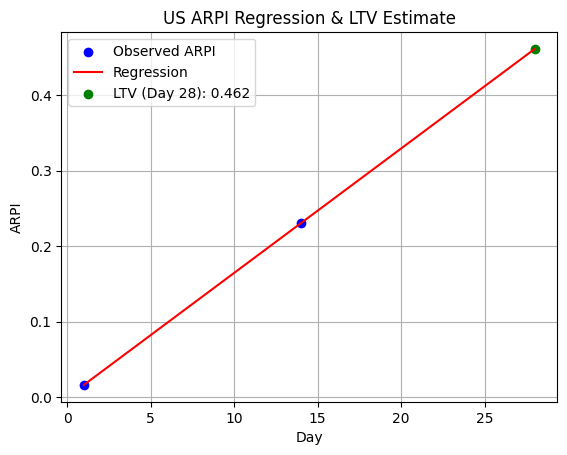

Mean ARPI_D1: 0.016
Mean ARPI_D14: 0.230
Estimated LTV (ARPI_D28) for US: 0.462


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and filter data for US, Fruit Battle, Dec 1-15, 2021
df = pd.read_csv('summary.csv')
us = df[(df['client'] == 'fruit_battle') & (df['country'] == 'US') &
        (df['year'] == 2021) & (df['month'] == 12) & (df['day'].between(1, 15))]

# Prepare ARPI points and fit regression
X = np.array([[1], [14]])
arpi_d1 = us['arpi_d1'].mean()
arpi_d14 = us['arpi_d14'].mean()
y = [arpi_d1, arpi_d14]
reg = LinearRegression().fit(X, y)
ltv = reg.predict([[28]])[0]

# Plot
plt.scatter([1, 14], y, color='blue', label='Observed ARPI')
plt.plot([1, 14, 28], reg.predict(np.array([[1],[14],[28]])), 'r-', label='Regression')
plt.scatter([28], [ltv], color='green', label=f'LTV (Day 28): {ltv:.3f}')
plt.title('US ARPI Regression & LTV Estimate')
plt.xlabel('Day'); plt.ylabel('ARPI'); plt.legend(); plt.grid(True); plt.show()

print(f"Mean ARPI_D1: {arpi_d1:.3f}")
print(f"Mean ARPI_D14: {arpi_d14:.3f}")
print(f"Estimated LTV (ARPI_D28) for US: {ltv:.3f}")